In [1]:
import pandas as pd
from google.colab import drive 
drive.mount('/gdrive', force_remount=True)
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_ = pd.read_csv("/gdrive/My Drive/Kaggle/sentiment-analysis-on-movie-reviews/train.tsv", delimiter='\t')

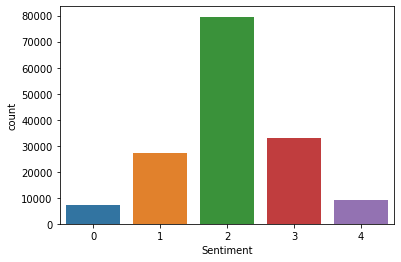

In [34]:
sns.countplot(x=df_['Sentiment'])

In [20]:
for i in df_['SentenceId'].unique()[0:10]:
  print(df_['Phrase'].loc[df_.SentenceId == i].iloc[0])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
This quiet , introspective and entertaining independent is worth seeking .
Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .
A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .
Aggressive self-glorification and a manipulative whitewash .
A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .
Narratively , Trouble Every Day is a plodding mess .
The Importance of Being Earnest , so thick with wit it plays like a reading from Bartlett 's Familiar Quotations
But it does n't leave you with much .
You could hate it for the same reason .


In [68]:
import string
table = str.maketrans('', '', string.punctuation) # Remplace les ponctuations par '' (les supprime)
words = df_['Phrase'].iloc[0]
stripped = [w.translate(table) for w in words] # Les ponctuations sont supprimées
low_stripped = [word.lower() for word in stripped] # On passe la phrase en lowercase
new_phrase='' # On flat la liste low_stripped
for i in low_stripped:
  new_phrase+=i
print(new_phrase) # On a récupérer words nettoyé sans les ponctiations et sans uppercase

a series of escapades demonstrating the adage that what is good for the goose is also good for the gander  some of which occasionally amuses but none of which amounts to much of a story 


In [0]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tokens = word_tokenize(words) # méthode permettant de séparer les mots
tok = [word for word in tokens if word.isalpha()] # la méthode isalpha() permet de ne garder que les mots et de supprimer les ponctuations
tok = [word.lower() for word in tok] # On passe le tout en lowercase
stop_words = stopwords.words('english') # list de mots anglais avec peu d'information type 'the', 'is', 'we', 'our' ...
tok_ = [word for word in tok if not word in stop_words] # On ne conserve que les mots qui ne sont pas dans la liste stop_words

In [0]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer() # méthode permettant de ne conserver que les racines des mots par exemple: “fishing,” “fished,” “fisher” all reduce to the stem “fish.”
stemmed = [porter.stem(word) for word in tok_]

In [98]:
stemmed

['seri',
 'escapad',
 'demonstr',
 'adag',
 'good',
 'goos',
 'also',
 'good',
 'gander',
 'occasion',
 'amus',
 'none',
 'amount',
 'much',
 'stori']